In [1]:
# First, import the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.simplefilter(action='ignore')

D:\conda\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# Read the dataset 
df = pd.read_csv("insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
# Check the information about whole features, good to see there is no NAN values in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


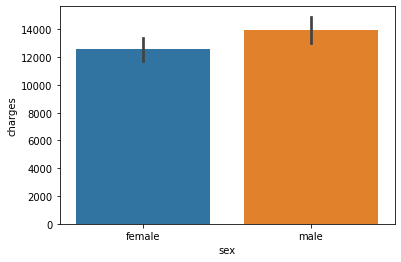

In [4]:
# Let's do some Exploratory Data Analysis(EDA)
sns.barplot(df["sex"],df["charges"]);

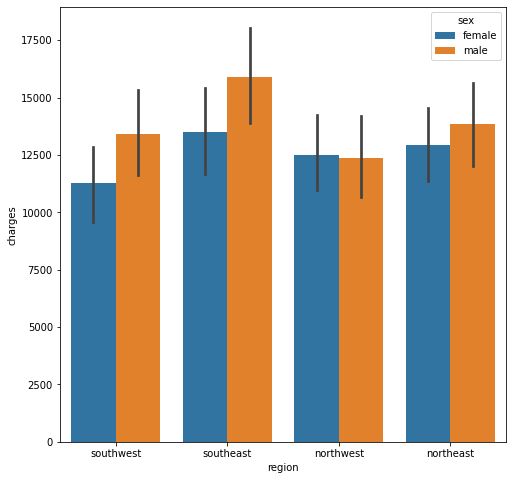

In [5]:
# Males tend to have more charges compare to females, except northwest region(it is almost equal).
plt.figure(figsize=(8,8))
sns.barplot(df["region"],df["charges"],data=df,hue=df["sex"]);

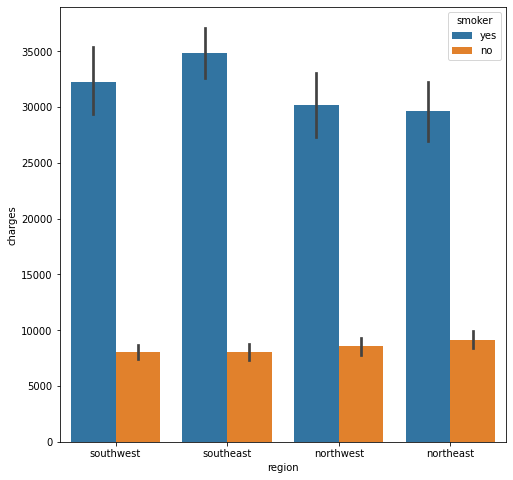

In [6]:
# There is no doubt that the smokers' charges are much higher. 
plt.figure(figsize=(8,8))
sns.barplot(df["region"],df["charges"],data=df,hue=df["smoker"]);

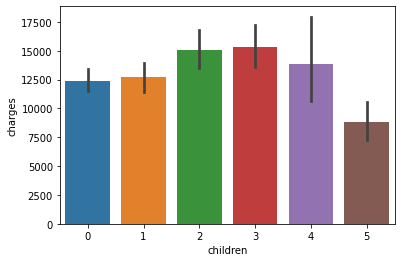

In [7]:
sns.barplot(df["children"],df["charges"]);

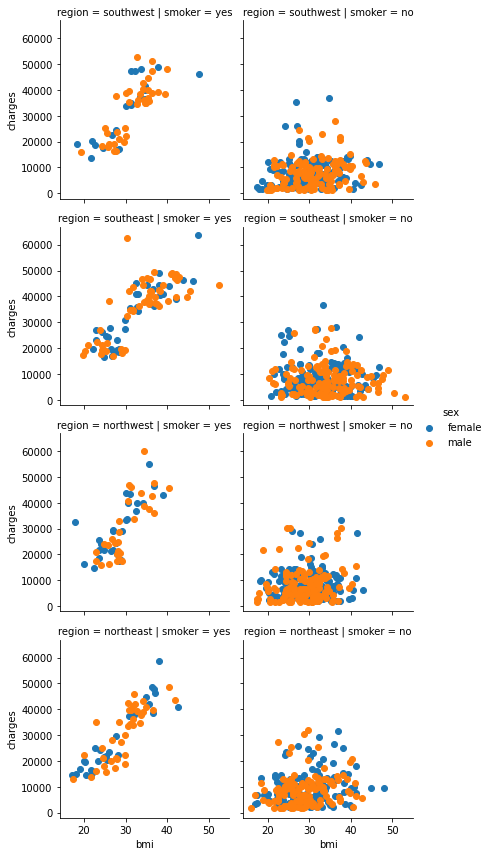

In [8]:
# Observe that individuals who smoke(does not matter male or female)have higher charges 
g = sns.FacetGrid(data=df,row="region",col="smoker",hue="sex")
g = g.map(plt.scatter,"bmi","charges").add_legend()

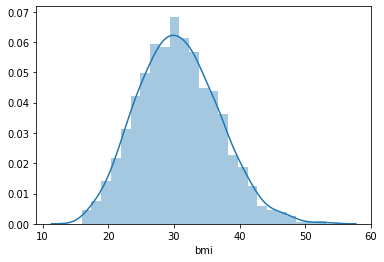

In [9]:
# Would like to check the distribution of "bmi". Well, good to see it's following the Gaussian distribution 
sns.distplot(df["bmi"]);

In [10]:
# Pay attention the statistical details for Quantitative features
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [11]:
# Look at the first five row again
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [12]:
# Apply One-hot Encoding for "sex" and "smoker" features in the dataset
df = pd.get_dummies(df,columns=["sex","smoker"],drop_first=True)

In [13]:
df.head()

,age,bmi,children,region,charges,sex_male,smoker_yes
0,19,27.900,0,southwest,16884.92400,0,1
1,18,33.770,1,southeast,1725.55230,1,0
2,28,33.000,3,southeast,4449.46200,1,0
3,33,22.705,0,northwest,21984.47061,1,0
4,32,28.880,0,northwest,3866.85520,1,0


In [14]:
# Check how much unique value and its count in "region"  
df["region"].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [15]:
# Apply Label Encoding for "region". Instead of LabelEncoder(), I simply encode manually with respect to their counts.
region_dict = {"southeast":3,"southwest":2,"northwest":1,"northeast":0}
df["region"] = df["region"].map(region_dict)

In [16]:
# Check the last form of the dataset, there is no NaN values and I handled the categorical features. That means my dataset is ready for applying any Machine Learning algorithm.
df.head()

,age,bmi,children,region,charges,sex_male,smoker_yes
0,19,27.900,0,2,16884.92400,0,1
1,18,33.770,1,3,1725.55230,1,0
2,28,33.000,3,3,4449.46200,1,0
3,33,22.705,0,1,21984.47061,1,0
4,32,28.880,0,1,3866.85520,1,0


In [17]:
# Identify the independent features(X) and the dependent feature(y)
X = df.drop("charges",axis=1)
y = df["charges"]

In [18]:
# Split the dataset into Training and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [19]:
# Before apply any ML algorithm, I need to standardize my independent features(especially for age and bmi features) for some algorithms.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [20]:
# Apply 5 different ML algorithm with default values, started from Linear Regression model
from sklearn.linear_model import LinearRegression

In [21]:
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)

LinearRegression()

In [22]:
# Check the r2 score for Linear Regression model
lin_reg.score(X_test,y_test)

0.7910886918703964

In [23]:
# Second, Ridge Regression model
from sklearn.linear_model import Ridge

In [24]:
ridge = Ridge(random_state=0)
ridge.fit(X_train_scaled,y_train)

Ridge(random_state=0)

In [25]:
# Check the r2 score for Ridge Regression model
ridge.score(X_test_scaled,y_test)

0.7910134001860784

In [26]:
# Third, Lasso Regression model
from sklearn.linear_model import Lasso

In [27]:
lasso = Lasso(random_state=0)
lasso.fit(X_train_scaled,y_train)

Lasso(random_state=0)

In [28]:
# Check the r2 score for Lasso Regression model
lasso.score(X_test_scaled,y_test)

0.7910761672174866

In [29]:
# Fourth, Gradient Boosting Regression model
from sklearn.ensemble import GradientBoostingRegressor

In [30]:
gb = GradientBoostingRegressor(random_state=0)
gb.fit(X_train,y_train)

GradientBoostingRegressor(random_state=0)

In [31]:
# Check the r2 score for Gradient Boosting Regression model
gb.score(X_test,y_test)

0.8846835811556408

In [32]:
# Last, Random Forest Regression model
from sklearn.ensemble import RandomForestRegressor

In [33]:
rf = RandomForestRegressor(random_state=0)
rf.fit(X_train,y_train)

RandomForestRegressor(random_state=0)

In [34]:
# Check the r2 score for Random Forest Regression model
rf.score(X_test,y_test)

0.8606249807608333

In [35]:
# Would like to apply cross validation to both traning and test set for my five ML model for choosing the best algorithm to continue
from sklearn.model_selection import cross_val_score

In [36]:
acc1 = cross_val_score(lin_reg,X_train,y_train,cv=20)
acc2 = cross_val_score(ridge,X_train_scaled,y_train,cv=20)
acc3 = cross_val_score(lasso,X_train_scaled,y_train,cv=20)
acc4 = cross_val_score(gb,X_train,y_train,cv=20)
acc5 = cross_val_score(rf,X_train,y_train,cv=20)

In [37]:
print(acc1.mean())
print(acc2.mean())
print(acc3.mean())
print(acc4.mean())
print(acc5.mean())

0.7066429231314544
0.7066975731676896
0.7066626312465154
0.8208893436210338
0.800645690768804


In [38]:
test_acc1 = cross_val_score(lin_reg,X_test,y_test,cv=20)
test_acc2 = cross_val_score(ridge,X_test_scaled,y_test,cv=20)
test_acc3 = cross_val_score(lasso,X_test_scaled,y_test,cv=20)
test_acc4 = cross_val_score(gb,X_test,y_test,cv=20)
test_acc5 = cross_val_score(rf,X_test,y_test,cv=20)

In [39]:
print(test_acc1.mean())
print(test_acc2.mean())
print(test_acc3.mean())
print(test_acc4.mean())
print(test_acc5.mean())

0.7403786602743909
0.7406071491086724
0.7403931793701184
0.8607028334071103
0.8446440982241338


In [40]:
# It seems the Gradient Boosting Regression model is the best choice for my dataset. Now, import the mean_squared_error to look at how many percentage my model has error 
from sklearn.metrics import mean_squared_error

In [41]:
# Predict the test set results
y_pred = gb.predict(X_test)

In [42]:
# Check the Root mean squared error rate (RMSE)
np.sqrt(mean_squared_error(y_test,y_pred))

4288.291924701991

In [43]:
# Would like to improve my accuracy. Thus, import the GridSearchCV 
from sklearn.model_selection import GridSearchCV

In [44]:
# Create the parameters for GridSearchCV
gb_param = {"n_estimators":[75,100,150,200,300,400],"learning_rate":[0.01,0.05,0.1,0.2,0.3],"min_samples_leaf":[0.7,0.8,0.9,1,1.1,1.2],"max_depth":[2,3,4,5,6]}

In [45]:
# Fit the GridSearchCV model to the training set
gb_grid = GridSearchCV(gb,gb_param,cv=10)
gb_grid.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=GradientBoostingRegressor(random_state=0),
             param_grid={'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3],
                         'max_depth': [2, 3, 4, 5, 6],
                         'min_samples_leaf': [0.7, 0.8, 0.9, 1, 1.1, 1.2],
                         'n_estimators': [75, 100, 150, 200, 300, 400]})

In [46]:
# Look at the best parameters for that model
gb_grid.best_params_

{'learning_rate': 0.01,
 'max_depth': 3,
 'min_samples_leaf': 1,
 'n_estimators': 400}

In [47]:
# Now, I create new Gradient Boosting Regression model with my best parameters.
new_gb = GradientBoostingRegressor(learning_rate=0.01,n_estimators=400)
new_gb.fit(X_train,y_train)

GradientBoostingRegressor(learning_rate=0.01, n_estimators=400)

In [48]:
# Predict the new test set results
y_new_pred = new_gb.predict(X_test)

In [49]:
# Compare the new accuracy with first one. Good to see that improve my accuracy
new_gb.score(X_test,y_test)

0.8921679063777771

In [50]:
# Look at the new RMSE
np.sqrt(mean_squared_error(y_test,y_new_pred))

4146.797112421097

In [51]:
# Import the pickle object to store my final model
import pickle

In [52]:
# Create a pickle object and save my model as "rf_regressor.pkl" . Now, my model is completely ready for deployment.
pickle.dump(new_gb,open("gb_regressor.pkl","wb"))
loaded_model = pickle.load(open("gb_regressor.pkl","rb"))